In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1) 
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


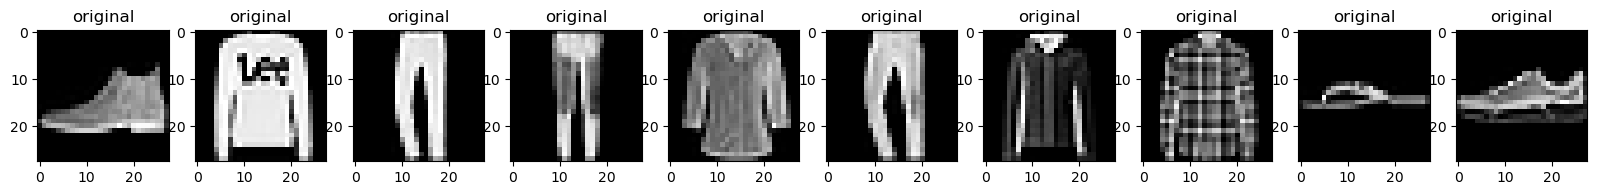

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [7]:
# Define the Vanilla CNN Autoencoder
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
autoencoder = Vanilla_CNN()

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
# Train the model with 30 epochs
history = autoencoder.fit(x_train, x_train,
                          epochs=30,  # Set to 30 epochs
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)  # Show training progress

Epoch 1/30
1875/1875 [==============================] - 72s 37ms/step - loss: 0.0127 - val_loss: 0.0055
Epoch 2/30
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 3/30
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/30
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/30
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/30
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 7/30
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 8/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 9/30
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/30
1875/1875 [==============================] - 72s 38m

In [11]:
# Calculate loss for the test dataset
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss (Mean Squared Error): {test_loss}")

313/313 [==============================] - 7s 21ms/step - loss: 0.0019
Test Loss (Mean Squared Error): 0.0018890787614509463


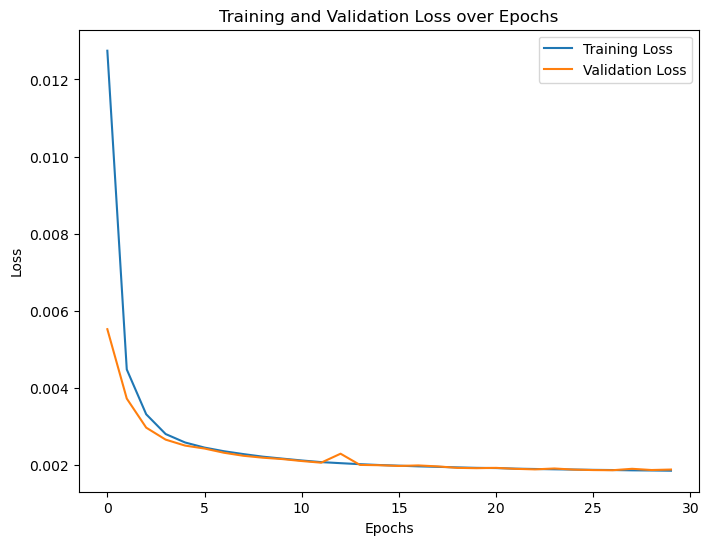

In [12]:
# Plotting train and validation loss against number of epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
autoencoder.encoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.decoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [15]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

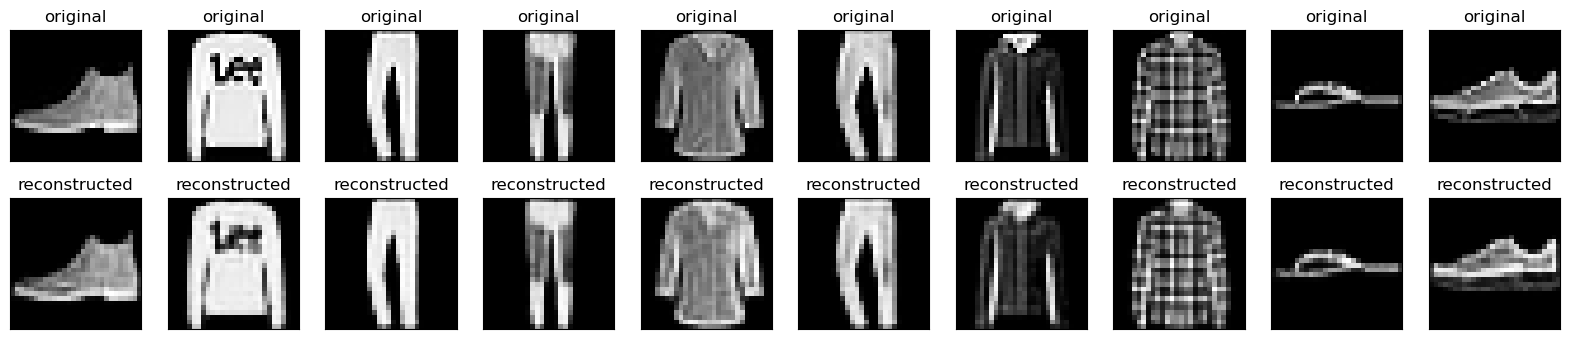

In [16]:
# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()